## Q1. 필요한 모듈 import 하고 편하게 쓰기 위해 as로 처리하기

In [3]:
import pandas as pd

## Q2. pandas모듈 사용해서 study.csv 파일 받아서 데이터 헤드 뽑아보기
## 'df_study'라는 데이터 프레임 만들기

In [16]:
# delimiter=','는 csv파일이 만약 다른 구분자로 나뉘었을때 사용
# header='infer' 첫행을 열이름으로 쓸것인지 정해주는것.
# 만약 jupyter를 실행한 경로에 data폴더가 있다면 그곳에 파일을 넣고 가져와야함.
df_study = pd.read_csv('data/study.csv',delimiter=',',header='infer')
df_study.head()

,Name,StudyHours,Grade
0,Borae,16.0,50.0
1,Jiwoo,12.0,45.0
2,Taegyu,9.0,40.0
3,Jeonghyun,2.0,NaN
4,Hwan,NaN,NaN


## Q3. 결측값 있는 칼럼들 보여주기(isnull사용)

In [18]:
# axis=0 은 행, axis=1 은 열을 의미함.
df_study[df_study.isnull().any(axis=1)]

,Name,StudyHours,Grade
3,Jeonghyun,2.0,NaN
4,Hwan,NaN,NaN


## Q4. 우리조 사람들의 평균 공부시간 구해서 mean_study 변수에 넣기

In [20]:
mean_study = df_study['StudyHours'].mean()
mean_study

9.75

### Q5. 우리조 사람들 중 평균 공부시간보다 많이 공부하는 사람들의 평균점수 구하기

In [22]:
df_study[df_study.StudyHours > mean_study].Grade.mean()

47.5

## Q6. 이번 시험의 통과점수는 40점이라고 한다. 
### 통과한 사람과 아닌사람을 나눠 'Pass'라는 새로운 칼럼을 만들고, 
### 기존 df_study에 추가하기. 'pass'는 변수로 쓸 수 없으니 passes에 넣어주고 
### 칼럼명을 바꿔줄것.

In [24]:
passes  = pd.Series(df_study['Grade'] >= 40)
df_study = pd.concat([df_study, passes.rename("Pass")], axis=1)

df_study

,Name,StudyHours,Grade,Pass
0,Borae,16.0,50.0,True
1,Jiwoo,12.0,45.0,True
2,Taegyu,9.0,40.0,True
3,Jeonghyun,2.0,NaN,False
4,Hwan,NaN,NaN,False


### Q.7 점수가 없는 정현군과 명환군 점수를 평균점수로 넣어주기(fillna사용)

In [34]:
df_study.Grade = df_study.Grade.fillna(df_study.Grade.mean())
df_study

,Name,StudyHours,Grade,Pass
0,Borae,16.0,50.0,True
1,Jiwoo,12.0,45.0,True
2,Taegyu,9.0,40.0,True
3,Jeonghyun,2.0,45.0,False
4,Hwan,NaN,45.0,False


## Q8. matplotlib 모듈 가져오기
## (notebook에서 바로 볼 수 있게 설정)

In [43]:
from matplotlib import pyplot as plt
%matplotlib inline

## Q9. x축은 조원이름, y축은 점수로 하여 barplot그리기

### 1) 사이즈 설정
### 2) x축 y축 설정하기
### 3) 그래프 제목 정해주기
### 4) x축 이름(라벨) 설정
### 5) y축 이름(라벨) 설정
### 6) 그리드 설정해주기

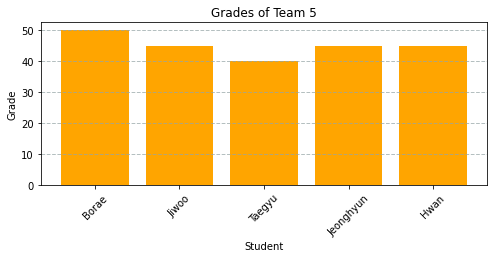

In [44]:
fig = plt.figure(figsize=(8,3))
plt.bar(x=df_study.Name, height=df_study.Grade, color='orange')

plt.title('Grades of Team 5')
plt.xlabel('Student')
plt.ylabel('Grade')
# linestyle은 저 모양대로 그리드 생성
# linewidth는 그리드 선 굵기 설정
# axis는 그리드를 x축, y축, 혹은 둘다 그릴지 정하는 것. (default=both) 
# alpha는 투명도를 설정할 수 있음
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation=45)

plt.show()

## 오늘 스터디 끝